In [1]:
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("ipl_matches.csv")

In [6]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


- DATA UNDERSTANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
df.shape

(756, 18)

## DATA CLEANING

In [11]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

- CATEGORIES COLUMN'S MODE IS IDENTIFIED

In [13]:
df[df["city"].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [14]:
df["city"].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [15]:
df["city"]=df["city"].replace("Bangalore","Bengaluru")

## city null values replaced with "venue"

In [17]:
df['city'] = df['city'].fillna('Sharjah')

- team

In [19]:
df["team1"].value_counts()

team1
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: count, dtype: int64

In [20]:
df["team1"]=df["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [21]:
df=df.replace("Rising Pune Supergiant","Rising Pune Supergiants")

In [22]:
df[df["winner"].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bengaluru,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [23]:
df["winner"]=df["winner"].fillna("no result")

In [24]:
df[df["player_of_match"].isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,no result,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,no result,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bengaluru,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,no result,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,no result,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [25]:
df["player_of_match"]=df["player_of_match"].fillna("no result")

In [26]:
df=df.drop(columns="umpire3",axis=1)

In [27]:
df.dropna(inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               754 non-null    int64 
 1   Season           754 non-null    object
 2   city             754 non-null    object
 3   date             754 non-null    object
 4   team1            754 non-null    object
 5   team2            754 non-null    object
 6   toss_winner      754 non-null    object
 7   toss_decision    754 non-null    object
 8   result           754 non-null    object
 9   dl_applied       754 non-null    int64 
 10  winner           754 non-null    object
 11  win_by_runs      754 non-null    int64 
 12  win_by_wickets   754 non-null    int64 
 13  player_of_match  754 non-null    object
 14  venue            754 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(4), object(13)
memory usage: 10

In [29]:
df['date'] = pd.to_datetime(df['date'],dayfirst=True)

In [30]:
df=df.drop(columns="id",axis=1)

In [31]:
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,IPL-2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [32]:
df["toss_decision"].value_counts()

toss_decision
field    462
bat      292
Name: count, dtype: int64

## EDA

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
top_10_player_of_the_match = df["player_of_match"].value_counts().head(10).index


In [36]:
top_10_player_of_the_match

Index(['CH Gayle', 'AB de Villiers', 'DA Warner', 'RG Sharma', 'MS Dhoni',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'V Kohli'],
      dtype='object', name='player_of_match')

In [37]:
top_10_players = df["player_of_match"].value_counts().head(10)
players = top_10_players.index
counts = top_10_players.values

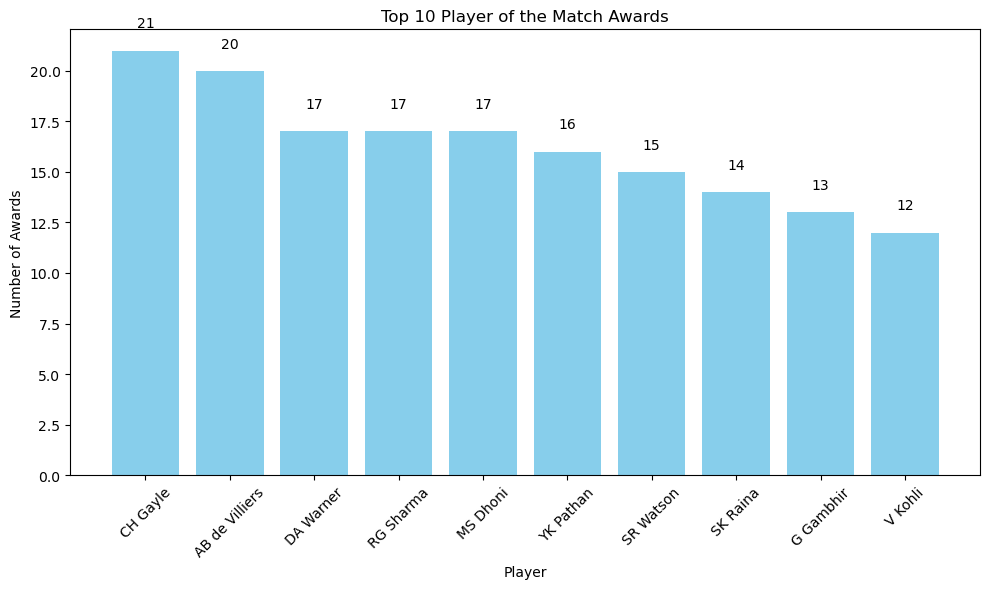

In [38]:
plt.figure(figsize=(10, 6))
bars = plt.bar(players, counts, color='skyblue')

plt.title("Top 10 Player of the Match Awards")
plt.xlabel("Player")
plt.ylabel("Number of Awards")
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [39]:
plt.savefig("top_5_player_of_the_match.png")

<Figure size 640x480 with 0 Axes>

In [40]:
top__winner = df['winner'].value_counts().nlargest(10)

In [41]:
top__winner

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Name: count, dtype: int64

In [42]:
percentages_of_top= top__winner / len(df) * 100
percentages_of_top

winner
Mumbai Indians                 14.456233
Chennai Super Kings            13.262599
Kolkata Knight Riders          12.201592
Royal Challengers Bangalore    11.007958
Kings XI Punjab                10.875332
Rajasthan Royals                9.946950
Delhi Daredevils                8.885942
Sunrisers Hyderabad             7.692308
Deccan Chargers                 3.846154
Rising Pune Supergiants         1.989390
Name: count, dtype: float64

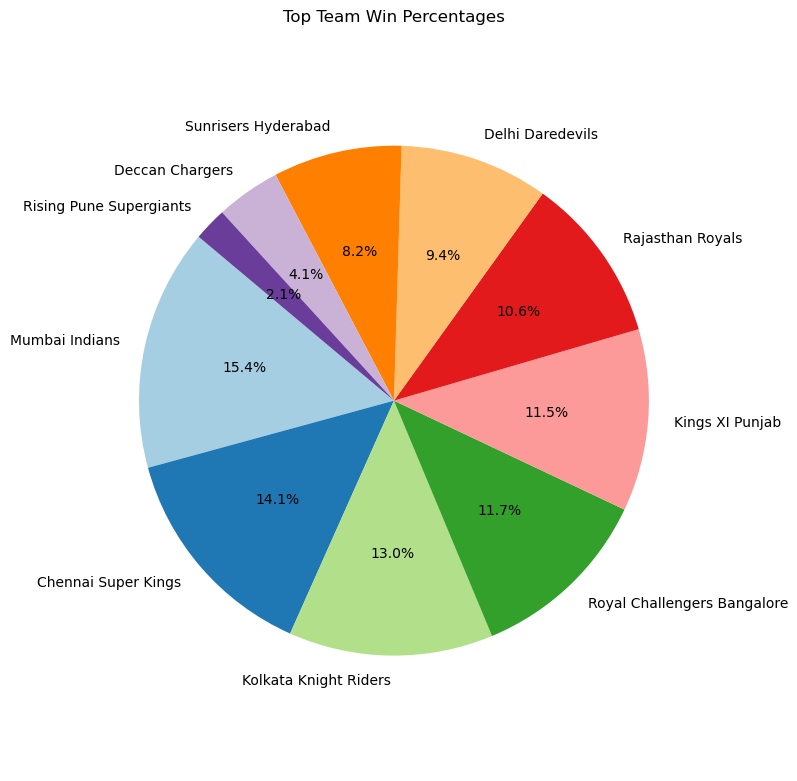

In [43]:
plt.figure(figsize=(8, 8))
plt.pie(
    percentages_of_top, 
    labels=percentages_of_top.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title("Top Team Win Percentages")
plt.axis('equal') 
plt.tight_layout()
plt.show()

In [44]:
plt.savefig("top_team_win_percentages.png")

<Figure size 640x480 with 0 Axes>

In [45]:
x=df[["win_by_wickets","win_by_runs"]]
y=df["toss_decision"].map({"field":0,"bat":1})

In [46]:
df['toss_decisions'] = df['toss_decision'].map({'field': 0, 'bat': 1})

In [47]:
correlation= df[['win_by_wickets', 'win_by_runs', 'toss_decisions']]

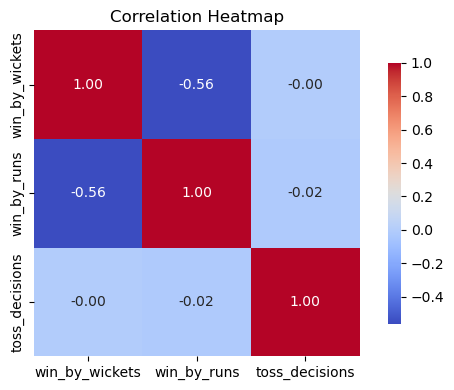

In [48]:
corr_matrix = correlation.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [49]:
plt.savefig("correlation_heatmap.png")

<Figure size 640x480 with 0 Axes>

In [50]:
df['toss_decision'].value_counts()

toss_decision
field    462
bat      292
Name: count, dtype: int64

In [51]:
toss_winner_won = (df['toss_winner'] == df['winner']).sum()
toss_winner_lost = len(df) - toss_winner_won

counts = [toss_winner_won, toss_winner_lost]
labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']

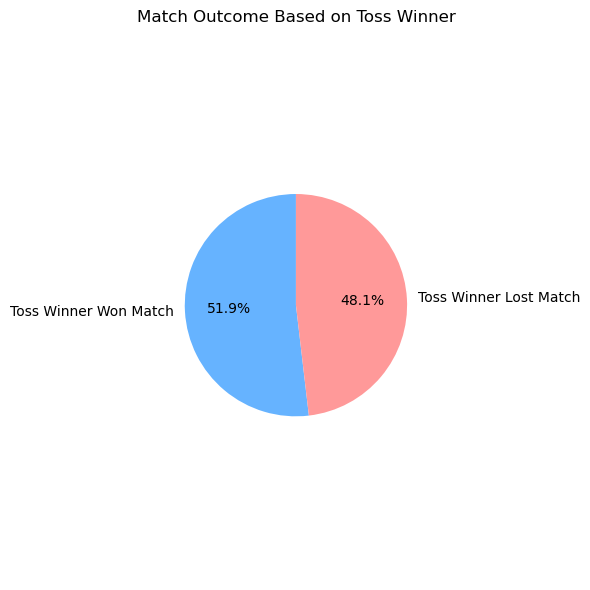

In [52]:
plt.figure(figsize=(6, 6))
plt.pie(
    counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
plt.title('Match Outcome Based on Toss Winner')
plt.axis('equal')
plt.tight_layout()
plt.show()

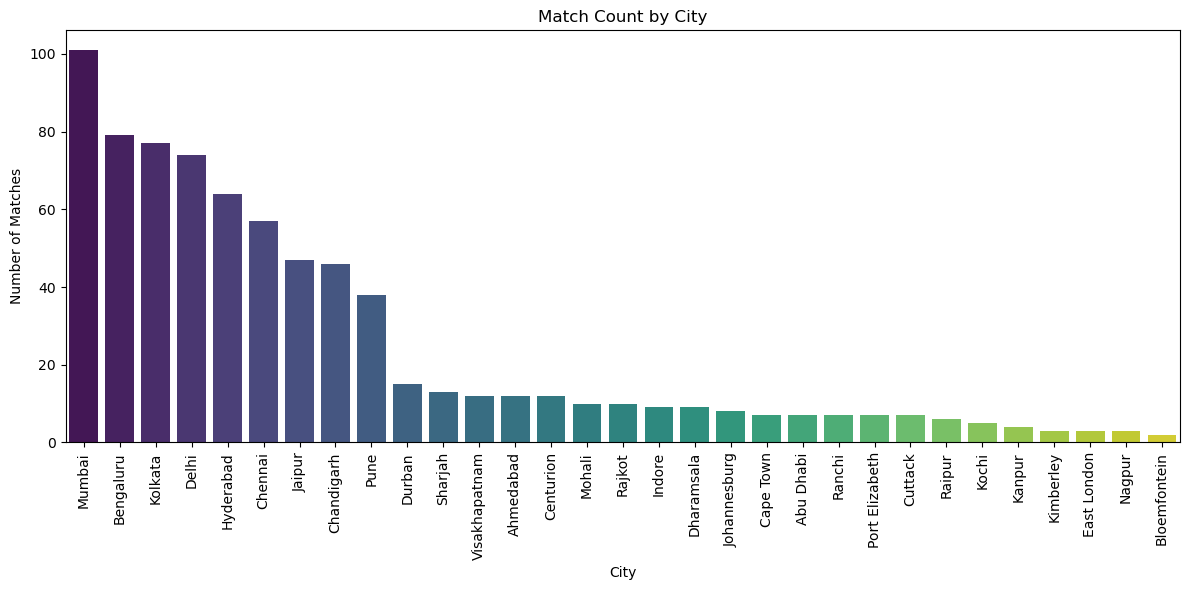

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(x='city', data=df, order=df['city'].value_counts().index, palette='viridis')

plt.xticks(rotation=90)
plt.title("Match Count by City")
plt.xlabel("City")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

In [54]:
plt.savefig("match_count_by_city.png")

<Figure size 640x480 with 0 Axes>

In [55]:
df['year'] = pd.to_datetime(df['date']).dt.year
yearly_matches = df['year'].value_counts().sort_index()

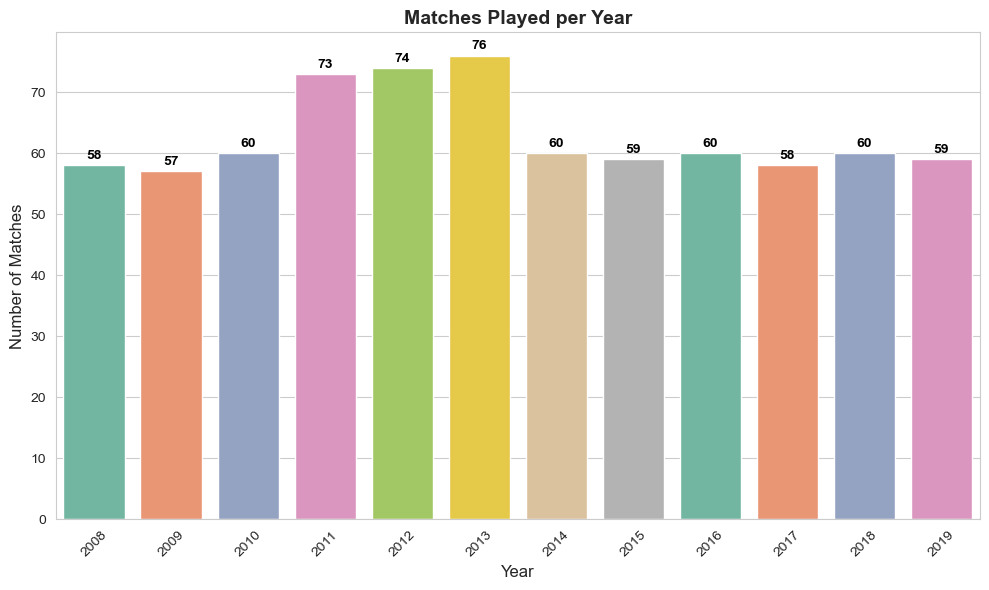

In [56]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Cleaner background
bars = sns.barplot(x=yearly_matches.index, y=yearly_matches.values, palette="Set2")
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.5, int(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.title('Matches Played per Year', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
plt.savefig("styled_matches_per_year.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [58]:
team_venue_wins = df.groupby(['venue', 'winner']).size().reset_index(name='wins')
top_performing_teams = team_venue_wins.loc[team_venue_wins.groupby('venue')['wins'].idxmax()]

print(top_performing_teams)

                                                 venue  \
0                                     ACA-VDCA Stadium   
1                                     Barabati Stadium   
5                                    Brabourne Stadium   
9                                         Buffalo Park   
12                               De Beers Diamond Oval   
19                          Dr DY Patil Sports Academy   
29   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...   
30                 Dubai International Cricket Stadium   
41                                        Eden Gardens   
49                                    Feroz Shah Kotla   
62                             Feroz Shah Kotla Ground   
66                                          Green Park   
71        Himachal Pradesh Cricket Association Stadium   
72                              Holkar Cricket Stadium   
77                                   IS Bindra Stadium   
80                  JSCA International Stadium Complex   
87            

In [59]:
top_teams_by_venue = (df.groupby(['venue', 'winner']).size().reset_index(name='wins').sort_values('wins', ascending=False)
    .groupby('venue').head(1).reset_index(drop=True))

In [60]:
print(top_teams_by_venue)

                                                venue  \
0                                        Eden Gardens   
1                                    Wankhede Stadium   
2                     MA Chidambaram Stadium, Chepauk   
3                               M Chinnaswamy Stadium   
4                              Sawai Mansingh Stadium   
5                                    Feroz Shah Kotla   
6           Rajiv Gandhi International Stadium, Uppal   
7          Punjab Cricket Association Stadium, Mohali   
8                        Sardar Patel Stadium, Motera   
9   Punjab Cricket Association IS Bindra Stadium, ...   
10                                  Brabourne Stadium   
11                          M. A. Chidambaram Stadium   
12       Himachal Pradesh Cricket Association Stadium   
13                 Rajiv Gandhi Intl. Cricket Stadium   
14            Maharashtra Cricket Association Stadium   
15                                  IS Bindra Stadium   
16                         Dr D

In [61]:

top_7_teams = df['winner'].value_counts().nlargest(7).index
top_performing_teams_filtered = top_performing_teams[top_performing_teams['winner'].isin(top_7_teams)]

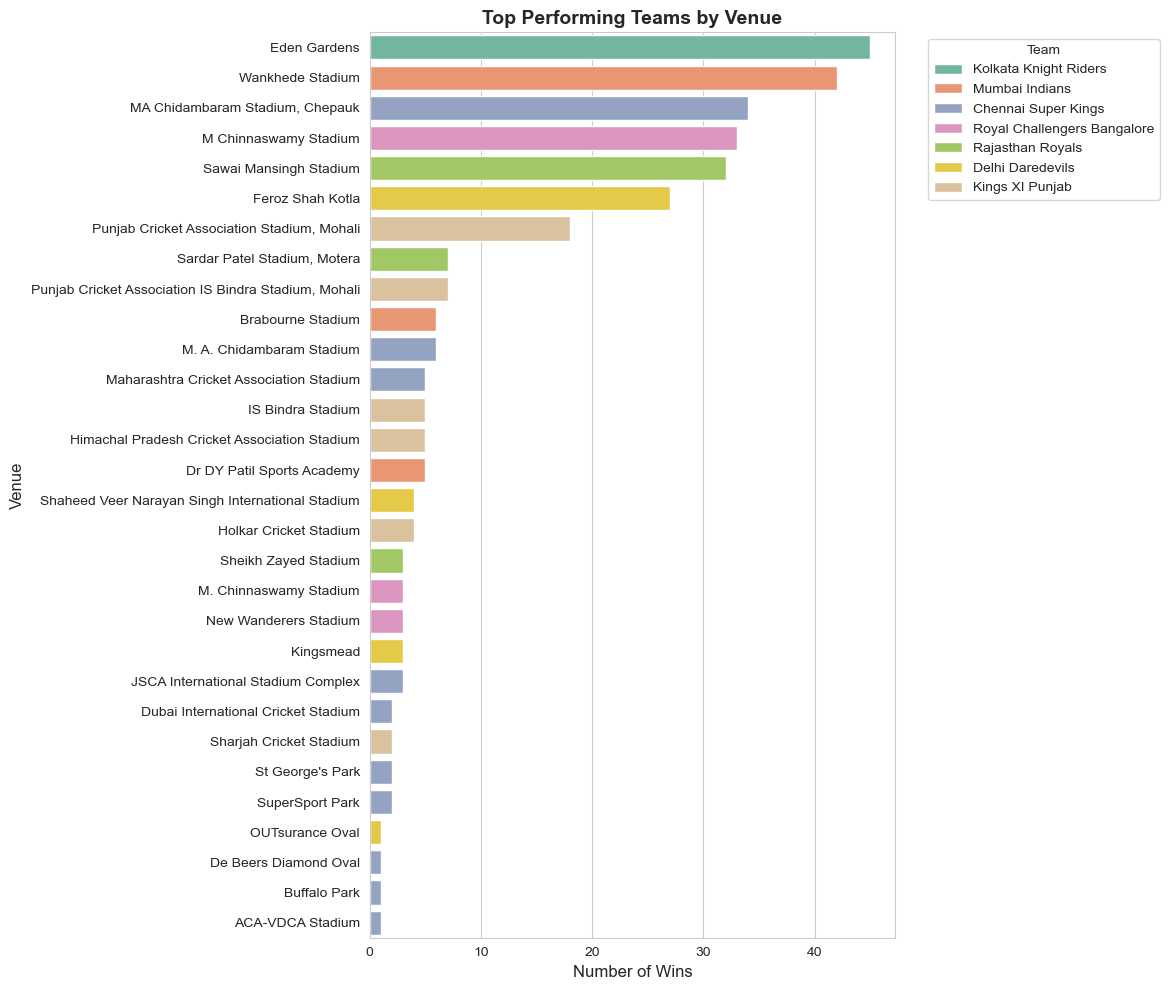

In [62]:
plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
top_performing_teams_filtered = top_performing_teams_filtered.sort_values(by='wins', ascending=False)
sns.barplot(
    y='venue',
    x='wins',
    hue='winner',
    data=top_performing_teams_filtered,
    palette='Set2'
)

plt.title("Top Performing Teams by Venue", fontsize=14, fontweight='bold')
plt.xlabel("Number of Wins", fontsize=12)
plt.ylabel("Venue", fontsize=12)
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [63]:
plt.savefig("top_performing_teams_horizontal.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [64]:
bottom_7_teams = df['winner'].value_counts().nsmallest(7).index
bottom_performing_teams_filtered = top_teams_by_venue[top_teams_by_venue['winner'].isin(bottom_7_teams)]

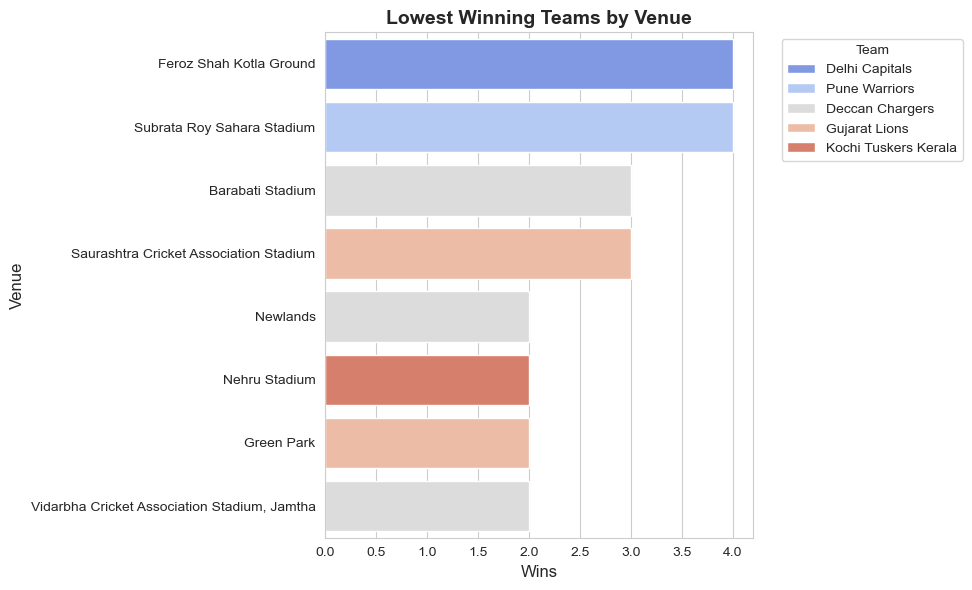

In [65]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(
    y='venue',
    x='wins',
    hue='winner',
    data=bottom_performing_teams_filtered,
    palette='coolwarm'
)
plt.title("Lowest Winning Teams by Venue", fontsize=14, fontweight='bold')
plt.xlabel("Wins", fontsize=12)
plt.ylabel("Venue", fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
plt.savefig("lowest_winning_teams_by_venue_horizontal.png", dpi=300)

<Figure size 640x480 with 0 Axes>

 ## MACHINE LEARNING

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler


In [69]:
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_decisions,year
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,2017
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0,2017
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0,2017
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0,2017
5,IPL-2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,0,2017


In [70]:
df_1 = df.copy(deep=True)

In [71]:
df_1.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_decisions,year
0,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,0,2017
1,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,0,2017
2,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,0,2017
3,IPL-2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,0,2017
5,IPL-2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,0,2017


In [72]:
df_1.drop(['date', 'umpire1', 'umpire2', 'player_of_match'], axis=1, inplace=True)

In [73]:
df_1.columns

Index(['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'venue', 'toss_decisions', 'year'],
      dtype='object')

In [74]:
categorical_cols = ['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'venue']

In [75]:
numerical_cols = ['dl_applied','win_by_runs', 'win_by_wickets']

In [76]:
encoder= LabelEncoder()

In [77]:
y=df_1["winner"]

In [78]:
y_encoded=encoder.fit_transform(y)

In [79]:
y_encoded

array([13, 11,  7,  5, 13,  8,  5,  3,  8,  7,  8,  4,  7,  3,  8, 11,  7,
       13, 12, 13,  8,  4,  8, 11,  5,  7, 11,  7,  4,  7, 13, 11,  8,  5,
       13,  8, 11,  3, 11,  3,  5, 11,  8,  7,  4, 13,  5,  3,  5,  3, 13,
        8, 11, 12, 11,  7,  8,  8,  7,  0,  3, 12,  7, 10,  3,  0, 10,  5,
       10,  0,  1,  5,  0,  8,  3,  5, 10,  3, 12,  5,  8, 10,  5,  1,  8,
        0,  7, 10,  8,  0,  7, 10,  5,  7,  8,  5,  3,  8,  5, 10,  8,  0,
        3, 10,  5, 12,  5,  3, 10, 12,  7, 10,  0, 10,  0, 10,  8, 12,  3,
        1,  0,  7,  1,  3, 10,  5,  1,  3,  5,  1,  8, 10, 12,  5,  3,  0,
        8, 12, 10,  0,  5, 12,  0, 10,  3,  1, 10,  0,  3,  5,  0,  8,  3,
        1, 12,  8,  3, 12, 10,  5,  0,  1,  5,  3,  7, 12,  7,  0,  3, 12,
        1, 12,  1,  7,  8,  3,  7,  1,  3, 12,  0,  8, 12,  0,  1, 10, 12,
        1,  5,  8, 12, 10,  8, 10,  7,  3, 10,  8,  3,  8,  0,  3,  7, 12,
        0,  8,  5,  3, 10,  0, 10,  7,  1,  5,  1, 12,  5,  8,  1,  8,  0,
       12,  3,  1,  8,  7

In [80]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [81]:
x =df_1[['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue']]

In [82]:
column_transformer = ColumnTransformer(transformers=[('encoder', encoder, x.columns)],remainder='drop')

In [83]:
encoded_array = column_transformer.fit_transform(x)

In [84]:
x_encoded = pd.DataFrame(encoded_array, columns=column_transformer.get_feature_names_out())

In [85]:
x_encoded.index = x.index

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.20, random_state=42)

In [87]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}


In [111]:
test_results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
    test_results.append((name, acc, prec, rec, f1))
test_df = pd.DataFrame(test_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("Test Performance:")
display(test_df)


Test Performance:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.576159,0.578552,0.576159,0.569825
1,SVM,0.549669,0.540205,0.549669,0.535859
2,KNN,0.516556,0.563969,0.516556,0.519713
3,Decision Tree,0.496689,0.496398,0.496689,0.486266
4,Random Forest,0.529801,0.515925,0.529801,0.518039
5,XGBoost,0.543046,0.555785,0.543046,0.538220


In [112]:
train_results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred_train)
    prec = precision_score(y_train, y_pred_train, average='weighted', zero_division=0)
    rec = recall_score(y_train, y_pred_train, average='weighted', zero_division=0)
    f1 = f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
    train_results.append((name, acc, prec, rec, f1))
train_df = pd.DataFrame(train_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print("Train Performance:")
display(train_df)

Train Performance:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.787728,0.792541,0.787728,0.783464
1,SVM,0.776119,0.778591,0.776119,0.771021
2,KNN,0.608624,0.630300,0.608624,0.600814
3,Decision Tree,0.892206,0.897059,0.892206,0.889541
4,Random Forest,0.892206,0.894725,0.892206,0.890762
5,XGBoost,0.873964,0.876176,0.873964,0.872876


In [113]:
x =df_1[['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue']]

In [114]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [115]:
column_transformer = ColumnTransformer(transformers=[('encoder', encoder, x.columns)],remainder='drop')

In [116]:
encoded_array = column_transformer.fit_transform(x)

In [117]:
x_encoded = pd.DataFrame(encoded_array, columns=column_transformer.get_feature_names_out())

In [118]:
x_encoded = x_encoded.fillna(0)

In [119]:
x_encoded.index = x.index

In [120]:
label_encoder = LabelEncoder()

In [121]:
y = df_1["winner"]

In [122]:
y_encoded = label_encoder.fit_transform(y)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.2, random_state=42)

In [124]:
smote = SMOTE(random_state=42,k_neighbors=1)

In [125]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [126]:
rus = RandomUnderSampler(random_state=42)

In [127]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [129]:
print("Original y_train shape:", y_train.shape)
print("After RandomUnderSampler:", y_train_rus.shape)
print("After SMOTE:", y_train_smote.shape)


Original y_train shape: (603,)
After RandomUnderSampler: (45,)
After SMOTE: (1350,)


Original Y_Train shape: (603,)


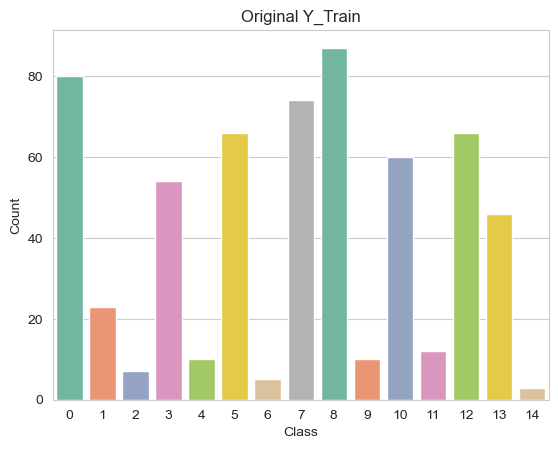

After Random Undersampling (RUS) shape: (45,)


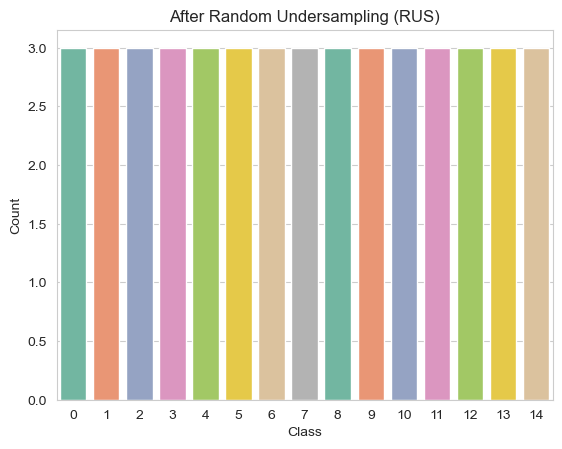

After SMOTE shape: (1350,)


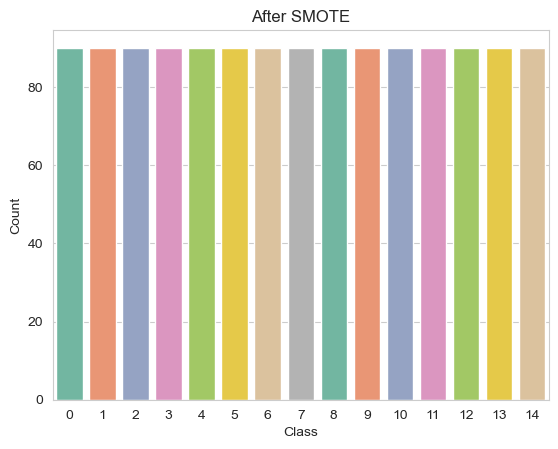

In [130]:
def plot_distribution(y, title):
    print(f"{title} shape: {y.shape}")
    value_counts = pd.Series(y).value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='Set2')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()
plot_distribution(y_train, "Original Y_Train")
plot_distribution(y_train_rus, "After Random Undersampling (RUS)")
plot_distribution(y_train_smote, "After SMOTE")

In [131]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

In [132]:
models['Decision Tree'].set_params(class_weight='balanced')

DecisionTreeClassifier(class_weight='balanced')

In [133]:
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1,3,5,7,9,10],'penalty': ['l1', 'l2'],'solver': ['liblinear', 'saga'],'max_iter': [200, 500, 1000] },
    'SVM': {'C': [0.01, 0.1, 1,3,5,],'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto']},
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']},
    'Decision Tree': {'criterion': ['gini', 'entropy'],'max_depth': [5, 10, 15, 20],'min_samples_split': [2, 4, 6],'min_samples_leaf': [1, 2, 4]},
    'Random Forest': {'n_estimators': [100, 200],'max_depth': [10, 20, None],'min_samples_split': [2, 4],'min_samples_leaf': [1, 2]},
    'XGBoost': {'n_estimators': [100, 200],'max_depth': [3, 6, 9],'learning_rate': [0.01, 0.1],'subsample': [0.8, 1],'colsample_bytree': [0.8, 1],
                'gamma': [0, 0.1, 0.2]}
}


In [134]:
xgb = XGBClassifier(tree_method='hist',use_label_encoder=False,eval_metric='logloss')


In [135]:
use_smote_models = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']

In [136]:
train_results = []

for name, model in models.items():
    print(f"Training and tuning {name}...")

    if name in use_smote_models:
        X_train_used, y_train_used = X_train_smote, y_train_smote
    elif name in ['KNN', 'Decision Tree']:
        X_train_used, y_train_used = X_train_rus, y_train_rus
    else:
        X_train_used, y_train_used = X_train, y_train

    grid = GridSearchCV(model, param_grids[name], cv=2, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid.fit(X_train_used, y_train_used)
    best_model = grid.best_estimator_

    y_train_pred = best_model.predict(X_train_used)
    train_acc = accuracy_score(y_train_used, y_train_pred)
    train_prec = precision_score(y_train_used, y_train_pred, average='weighted', zero_division=0)
    train_rec = recall_score(y_train_used, y_train_pred, average='weighted', zero_division=0)
    train_f1 = f1_score(y_train_used, y_train_pred, average='weighted', zero_division=0)
    train_results.append((name, train_acc, train_prec, train_rec, train_f1))


train_df = pd.DataFrame(train_results, columns=['Model', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1 Score'])

print("\nTrain Performance:")
display(train_df)



Training and tuning Logistic Regression...
Fitting 2 folds for each of 108 candidates, totalling 216 fits
Training and tuning SVM...
Fitting 2 folds for each of 20 candidates, totalling 40 fits
Training and tuning KNN...
Fitting 2 folds for each of 20 candidates, totalling 40 fits
Training and tuning Decision Tree...
Fitting 2 folds for each of 72 candidates, totalling 144 fits
Training and tuning Random Forest...
Fitting 2 folds for each of 24 candidates, totalling 48 fits
Training and tuning XGBoost...
Fitting 2 folds for each of 144 candidates, totalling 288 fits

Train Performance:


,Model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1 Score
0,Logistic Regression,0.932593,0.932514,0.932593,0.932053
1,SVM,0.941481,0.941834,0.941481,0.940808
2,KNN,1.000000,1.000000,1.000000,1.000000
3,Decision Tree,0.866667,0.894444,0.866667,0.856825
4,Random Forest,0.950370,0.951108,0.950370,0.950114
5,XGBoost,0.945185,0.946018,0.945185,0.945102


In [137]:
test_results = []

for name, model in models.items():
    print(f"Training and tuning {name}...")

    if name in use_smote_models:
        X_train_used, y_train_used = X_train_smote, y_train_smote
    elif name in ['KNN', 'Decision Tree']:
        X_train_used, y_train_used = X_train_rus, y_train_rus
    else:
        X_train_used, y_train_used = X_train, y_train

    grid = GridSearchCV(model, param_grids[name], cv=2, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_used, y_train_used)
    best_model = grid.best_estimator_


    y_test_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_rec = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_results.append((name, test_acc, test_prec, test_rec, test_f1))


test_df = pd.DataFrame(test_results, columns=['Model', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1 Score'])

print("\nTest Performance:")
display(test_df)

Training and tuning Logistic Regression...
Training and tuning SVM...
Training and tuning KNN...
Training and tuning Decision Tree...
Training and tuning Random Forest...
Training and tuning XGBoost...

Test Performance:


,Model,Test_Accuracy,Test_Precision,Test_Recall,Test_F1 Score
0,Logistic Regression,0.801325,0.816179,0.801325,0.800511
1,SVM,0.814570,0.825189,0.814570,0.809742
2,KNN,0.298013,0.458788,0.298013,0.294333
3,Decision Tree,0.377483,0.478317,0.377483,0.396206
4,Random Forest,0.794702,0.802321,0.794702,0.788659
5,XGBoost,0.814570,0.821726,0.814570,0.811930
